In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import h,c,k
from scipy.integrate import trapz

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in true_divide
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in true_divide
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in true_divide


(0, 0.9)

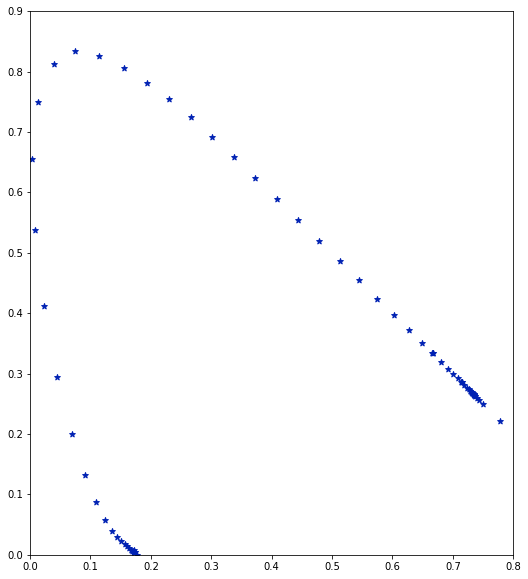

In [4]:
text = np.loadtxt('cie-cmf.txt') #source: https://scipython.com/blog/converting-a-spectrum-to-a-colour/
w_ = text[:,0]
x_ = text[:,1]
y_ = text[:,2]
z_ = text[:,3]

T = x_ + y_ + z_
x = x_/T
y = y_/T
z = z_/T

fig, ax = plt.subplots(1,1, figsize = (10,10))
ax.scatter(x,y, marker = '*', color = '#0021b3') #para lang matingkad kulay
ax.axis('square')
ax.set_xlim(0,0.8)
ax.set_ylim(0,0.9)

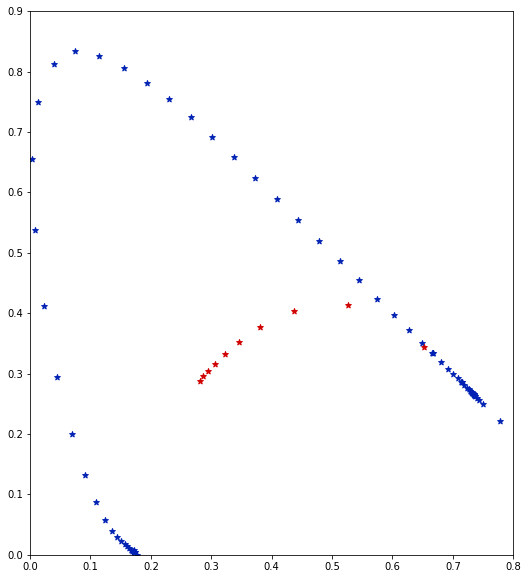

In [5]:
def B(l,T):
    return (2 * h * c**2)/(l**5 * (np.e**(h*c/(l*k*T)) - 1))

T_ = 1000
step = 5e-9
T_p = np.arange(1000,10000+T_,T_)
wavelengths = np.arange(380e-9,780e-9 + step,step)

fig, ax = plt.subplots(1,1, figsize = (10,10))
ax.scatter(x,y, marker = '*', color = '#0021b3')
ax.axis('square')
ax.set_xlim(0,0.8)
ax.set_ylim(0,0.9)

for t in T_p:
    I = B(wavelengths,t)
    X_p = trapz(I*x_,wavelengths)
    Y_p = trapz(I*y_,wavelengths)
    Z_p = trapz(I*z_,wavelengths)
    XYZ_p = X_p + Y_p + Z_p
    x_p = X_p/XYZ_p
    y_p = Y_p/XYZ_p
    z_p = Z_p/XYZ_p
    ax.scatter(x_p,y_p, marker = '*', color = '#d10000')
